## Import packages

In [88]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.style.use('ggplot')

In [89]:
df=pd.read_csv("breast-cancer.csv")
df.sample(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
463,911320501,B,11.600,18.36,73.88,412.7,0.08508,0.05855,0.03367,0.01777,...,12.770,24.02,82.68,495.1,0.13420,0.18080,0.18600,0.08288,0.3210,0.07863
386,902975,B,12.210,14.09,78.78,462.0,0.08108,0.07823,0.06839,0.02534,...,13.130,19.29,87.65,529.9,0.10260,0.24310,0.30760,0.09140,0.2677,0.08824
167,8712729,M,16.780,18.80,109.30,886.3,0.08865,0.09182,0.08422,0.06576,...,20.050,26.30,130.70,1260.0,0.11680,0.21190,0.23180,0.14740,0.2810,0.07228
47,85715,M,13.170,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,...,15.670,27.95,102.80,759.4,0.17860,0.41660,0.50060,0.20880,0.3900,0.11790
502,91505,B,12.540,16.32,81.25,476.3,0.11580,0.10850,0.05928,0.03279,...,13.570,21.40,86.67,552.0,0.15800,0.17510,0.18890,0.08411,0.3155,0.07538
374,9013005,B,13.690,16.07,87.84,579.1,0.08302,0.06374,0.02556,0.02031,...,14.840,20.21,99.16,670.6,0.11050,0.20960,0.13460,0.06987,0.3323,0.07701
206,879804,B,9.876,17.27,62.92,295.4,0.10890,0.07232,0.01756,0.01952,...,10.420,23.22,67.08,331.6,0.14150,0.12470,0.06213,0.05588,0.2989,0.07380
482,912519,B,13.470,14.06,87.32,546.3,0.10710,0.11550,0.05786,0.05266,...,14.830,18.32,94.94,660.2,0.13930,0.24990,0.18480,0.13350,0.3227,0.09326
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
525,91805,B,8.571,13.10,54.53,221.3,0.10360,0.07632,0.02565,0.01510,...,9.473,18.45,63.30,275.6,0.16410,0.22350,0.17540,0.08512,0.2983,0.10490


## Check is there any missing value present  or not

In [90]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Drop unnecessary column

In [91]:
df.drop('id',axis ='columns',inplace = True)

In [92]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

#### M means Malignint
#### B means Benign

## Data visualization

<Axes: >

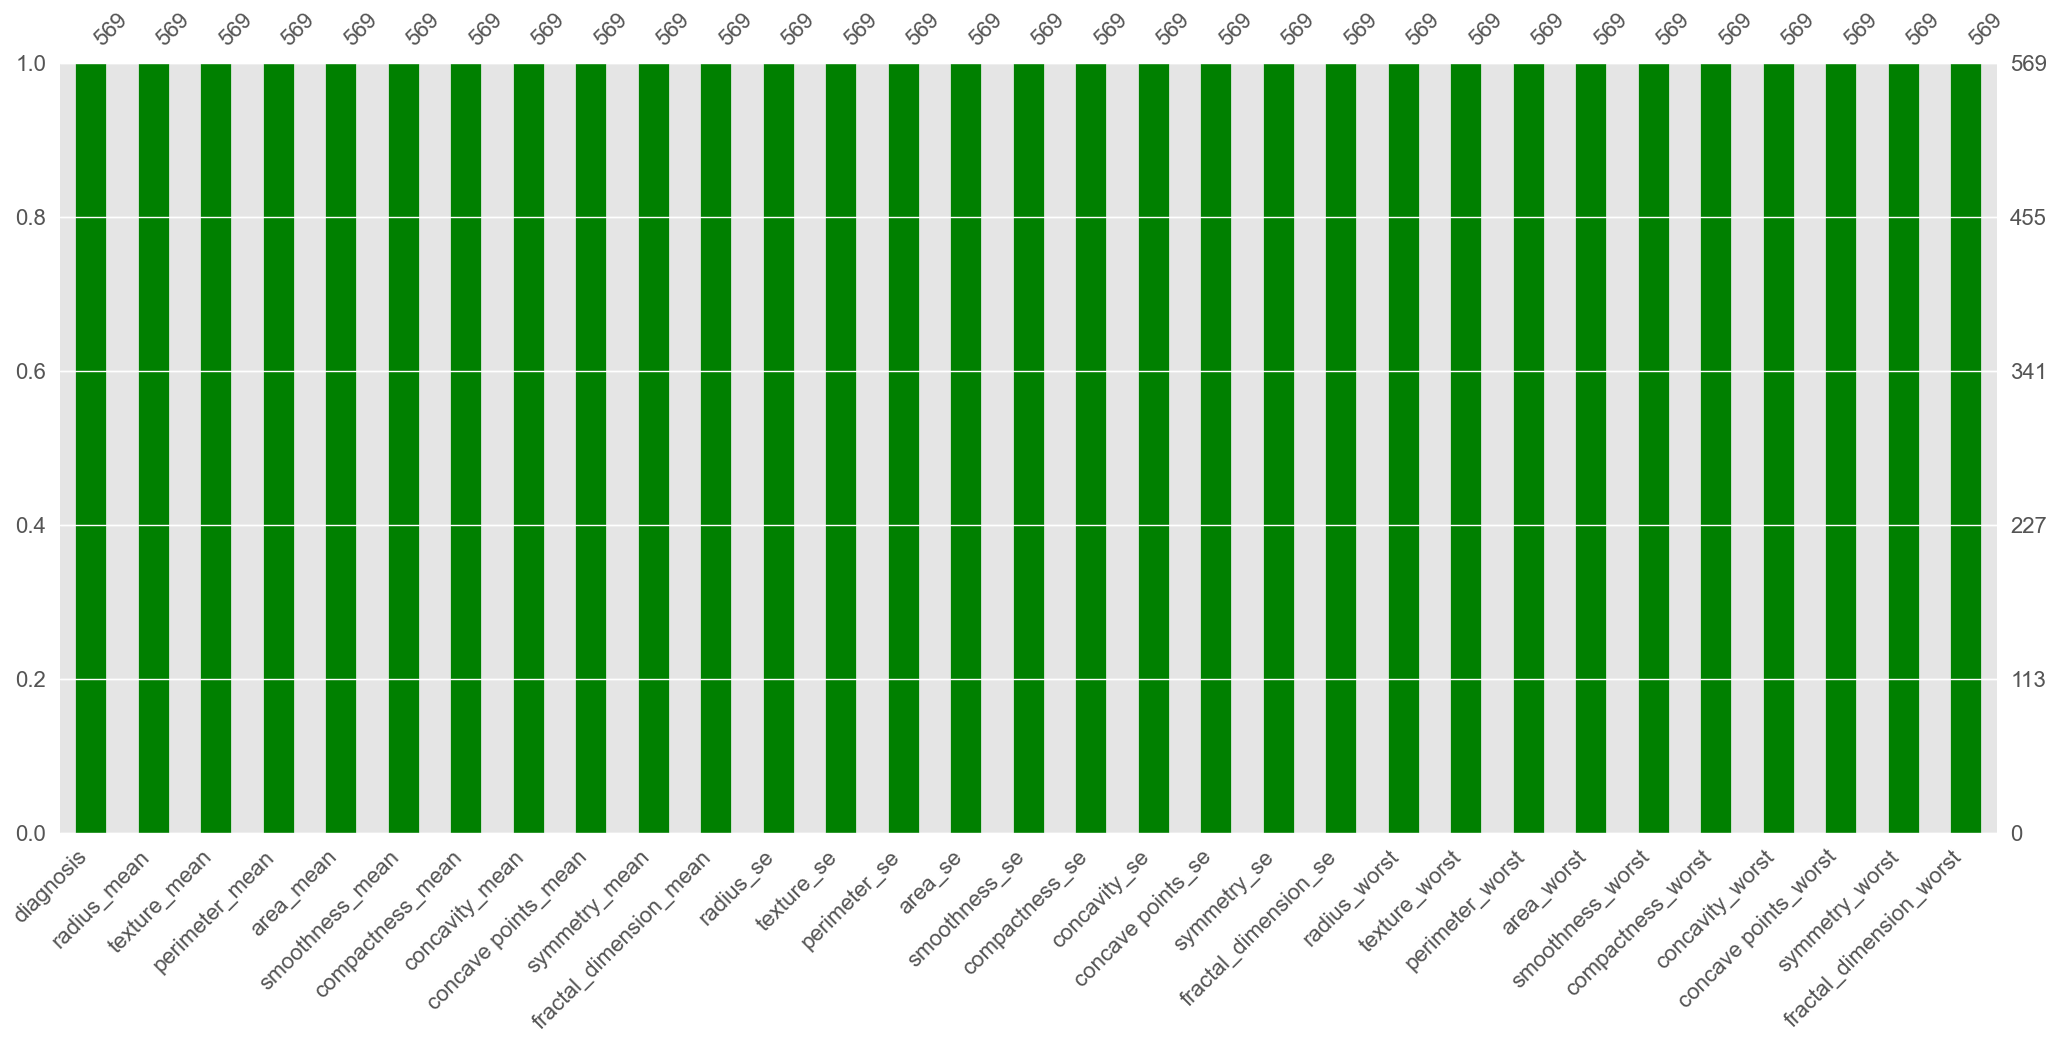

In [93]:
msno.bar(df,color="green")

### Replacing M and B with 1 and 0

In [94]:
df.replace({'diagnosis':{'M':1}},inplace=True)
df.replace({'diagnosis':{'B':0}},inplace=True)

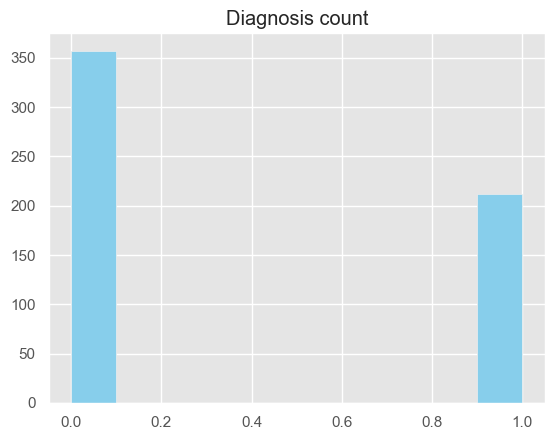

In [95]:
plt.hist(df["diagnosis"],color="skyblue")
plt.title('Diagnosis count')
plt.show()

## Density graph

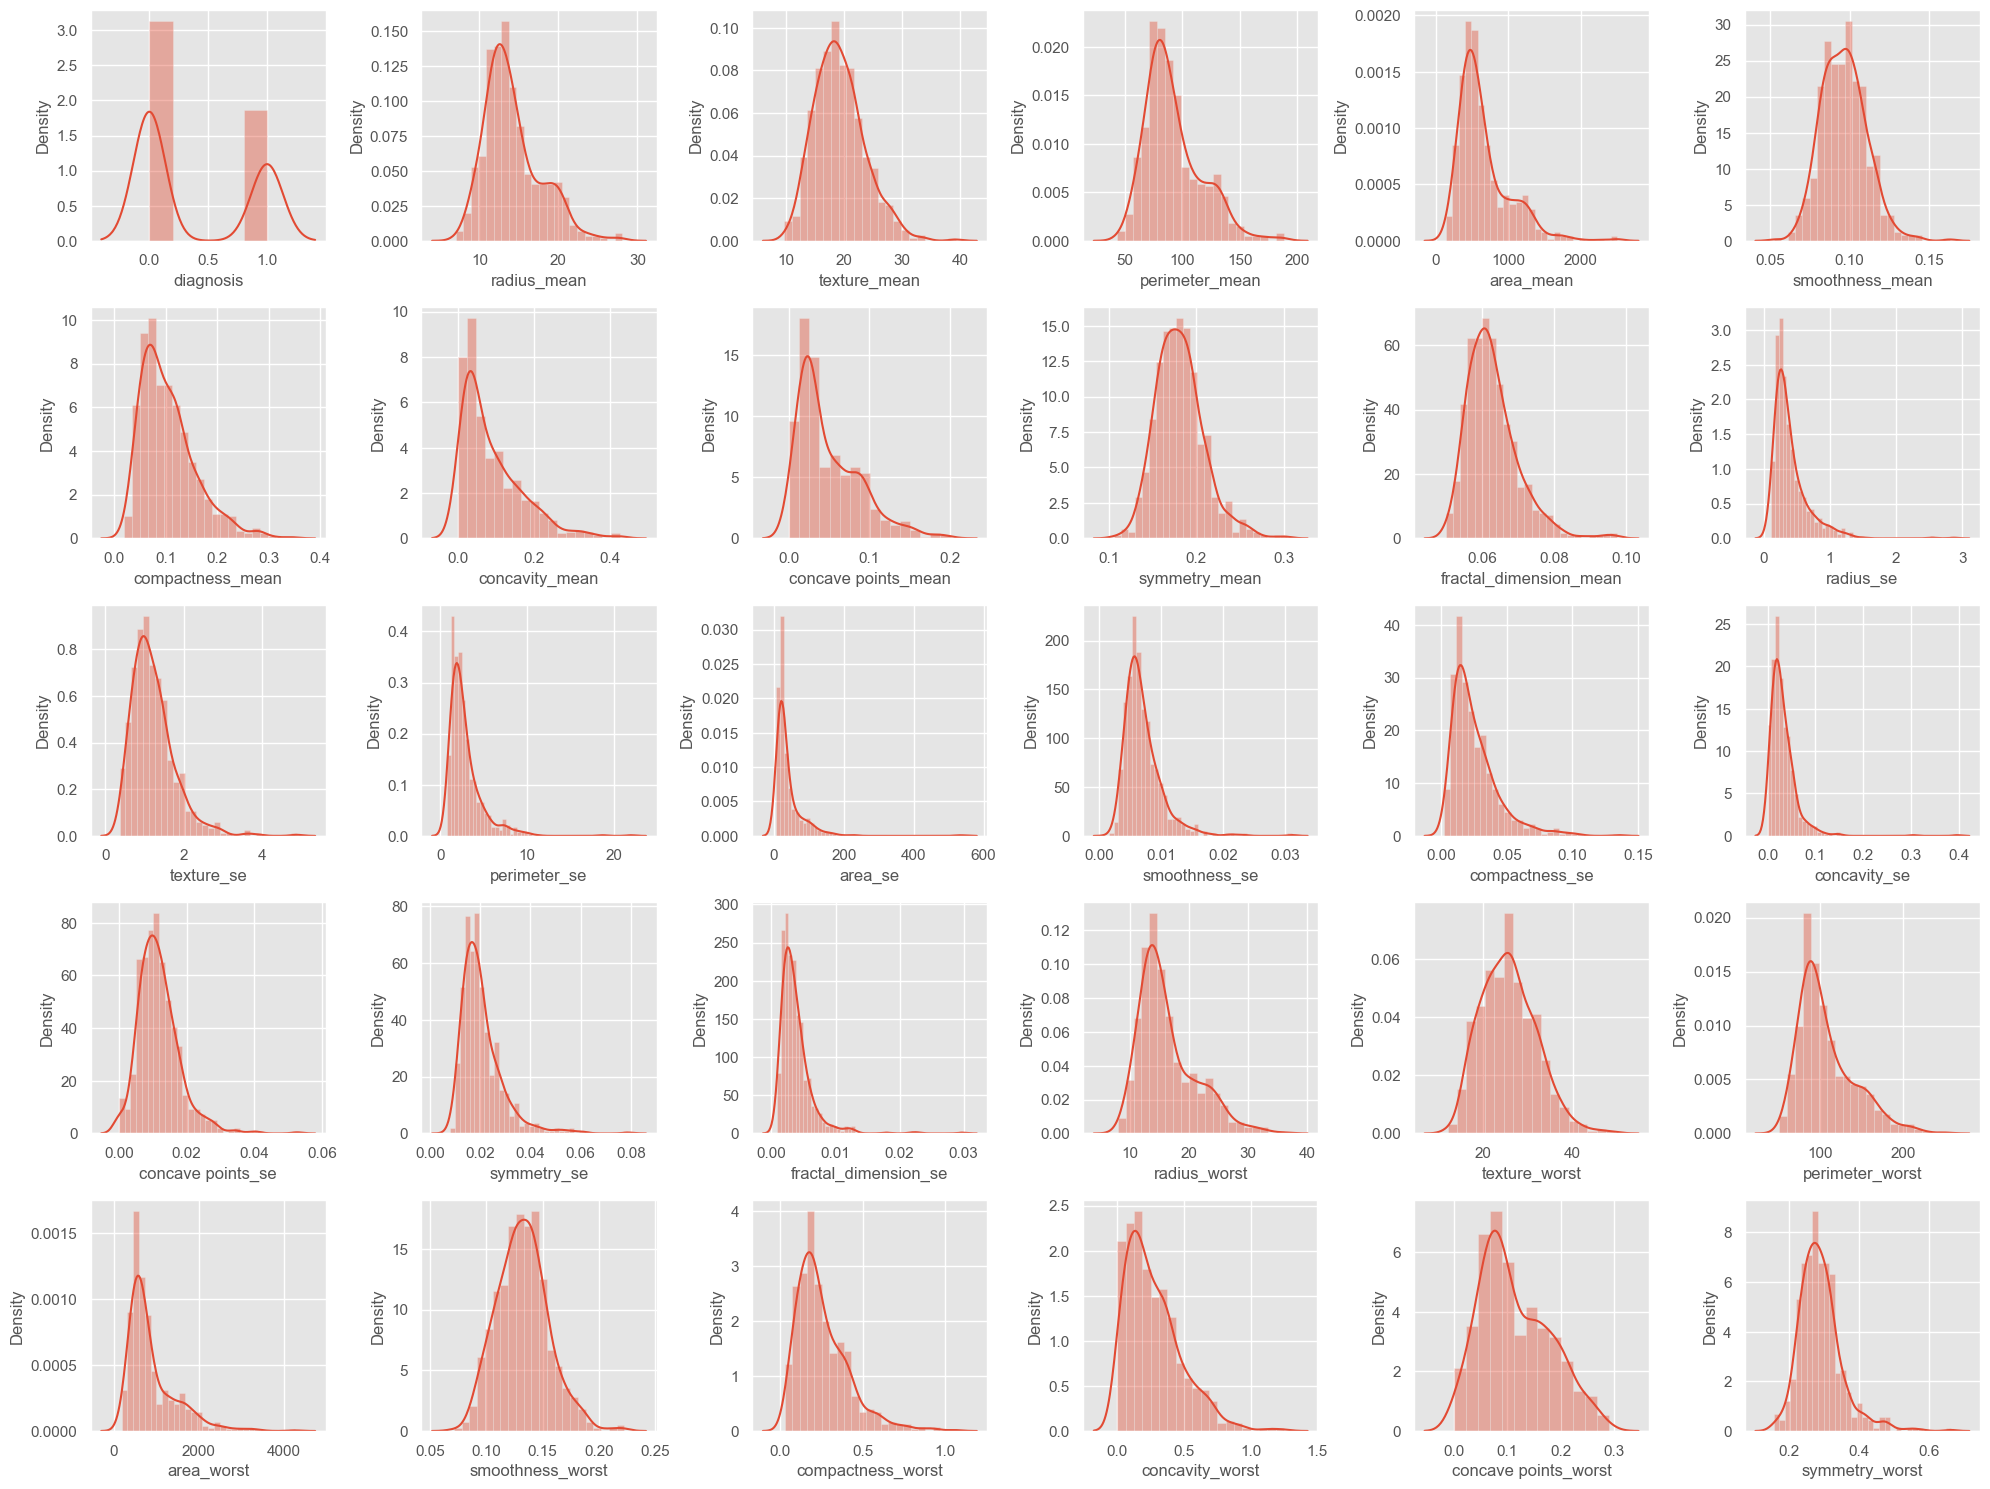

In [96]:
plt.figure(figsize=(20,15))
plotno = 1
for column in df:
    if plotno<=30:
        plt.subplot(5,6,plotno)
        sns.distplot(df[column])
        plt.xlabel(column)
    plotno+=1

plt.tight_layout()
plt.show()

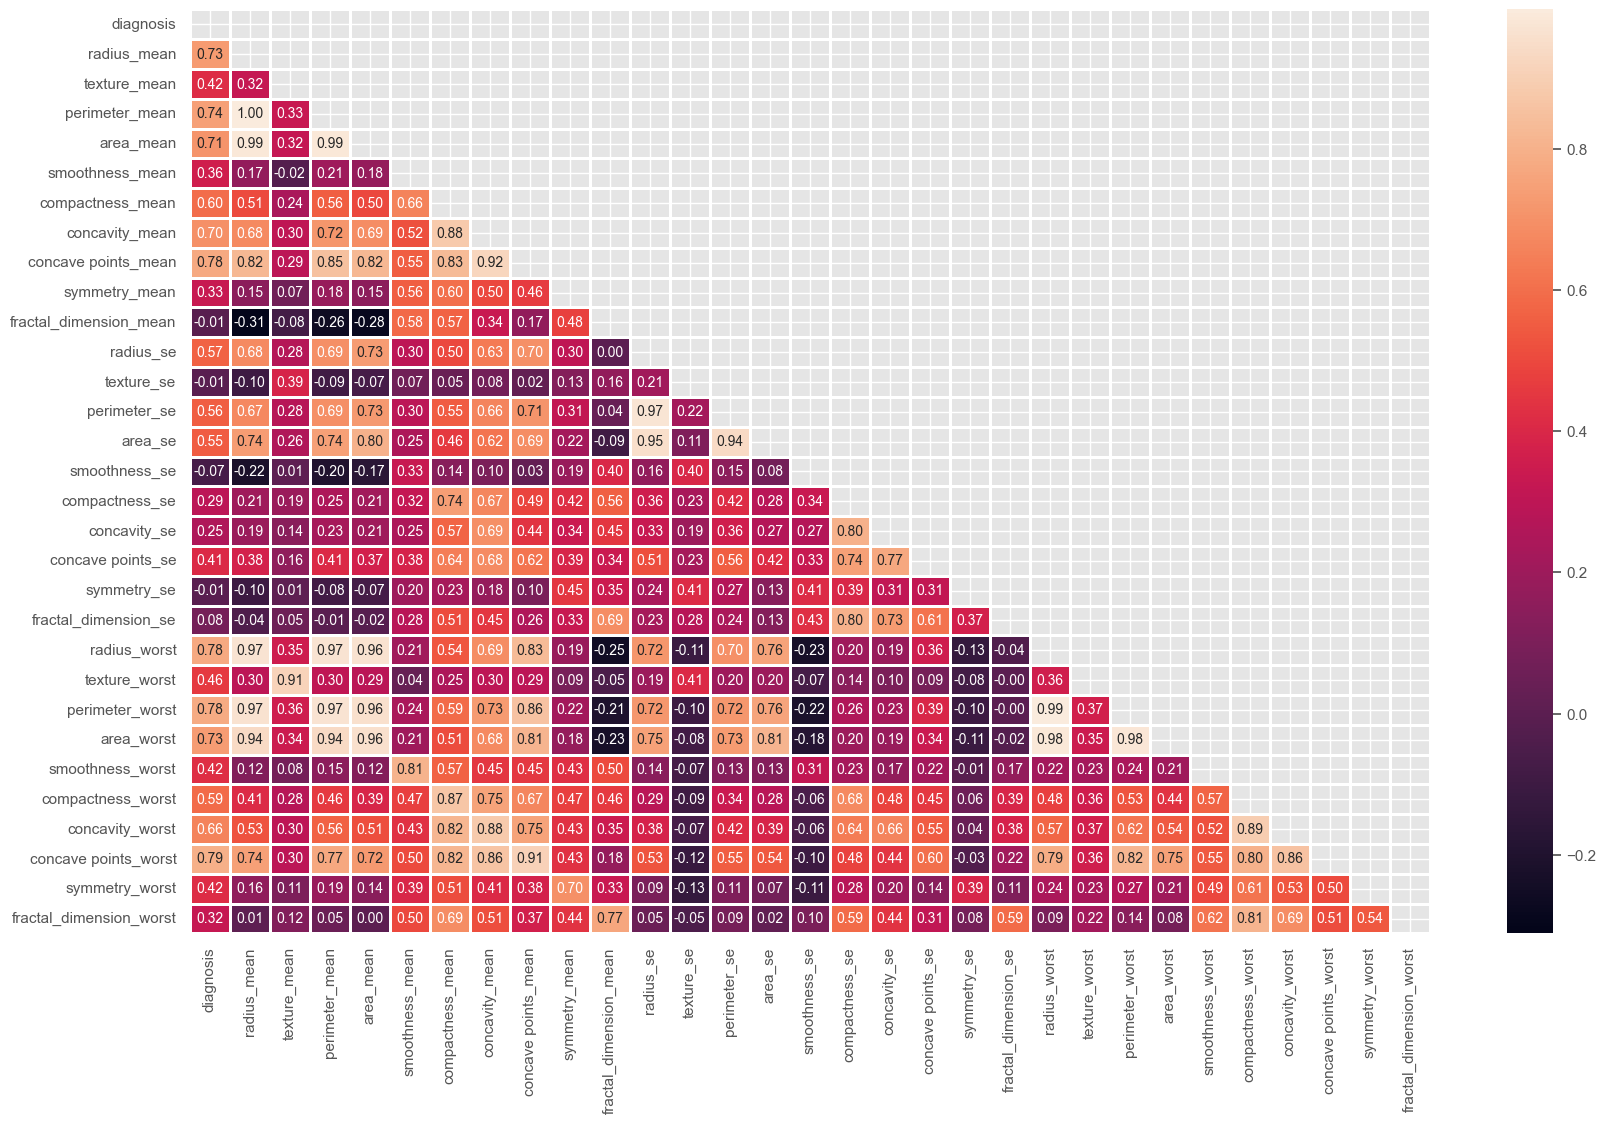

In [97]:
plt.figure(figsize=(20,12))
corr = df.corr()
m = np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr,mask=m,linewidths=1,annot=True,fmt=".2f")
plt.show()

## Feature Selection

In [98]:
corr_matrix = df.corr().abs()
m = np.triu(np.ones_like(corr_matrix,dtype=bool))
tri_df = corr_matrix.mask(m)

to_drop = [x for x in tri_df.columns if any(tri_df[x]>0.92)]
df = df.drop(to_drop,axis=1)
print(df.shape[1])


23


In [99]:
x = df.drop('diagnosis',axis=1)
y = df['diagnosis']

## Train Test split

In [100]:
from  sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=0)

## Model Training

In [101]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [102]:
from sklearn import svm
model = svm.SVC(kernel='linear',gamma='auto',C=2)
model.fit(x_train , y_train)

SVC(C=2, gamma='auto', kernel='linear')

## Accuracy Score predict

In [103]:
from sklearn.metrics import accuracy_score , confusion_matrix,classification_report


In [104]:
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(y_train, x_train_prediction)
print('accuracy_score of train data:',training_data_accuracy)

accuracy_score of train data: 0.989010989010989


In [105]:
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(y_test, x_test_prediction)
print('accuracy_score of test data:',test_data_accuracy)

accuracy_score of test data: 0.9824561403508771


### confusion matrix

In [106]:
print(confusion_matrix(y_test,x_test_prediction))

[[66  1]
 [ 1 46]]


### classification report

In [107]:
print(classification_report(y_test,x_test_prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        67
           1       0.98      0.98      0.98        47

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## Creating SAV  file

In [108]:
import pickle
filename = 'Trained_model.sav'
pickle.dump(svm.SVC,open(filename,'wb'))

In [109]:
Loaded_model = pickle.load(open('Trained_model.sav','rb'))